In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [95]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout,BatchNormalization, Bidirectional, LSTM, Reshape
from sklearn.metrics import accuracy_score

In [96]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

**Folder** **Paths**

In [97]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [98]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(7023, 150, 150, 3)

**Train** **Test** **Split**

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [100]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

**Convolutional** **Neural** **Network**

In [101]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), activation='relu',padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32,kernel_size=(2,2), activation='relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2), activation='relu', padding='same'))
model.add(Conv2D(64,kernel_size=(2,2), activation='relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(2,2), activation='relu', padding='same'))
model.add(Conv2D(128,kernel_size=(2,2), activation='relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(2,2), activation='relu', padding='same'))
model.add(Conv2D(256,kernel_size=(2,2), activation='relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Reshape((9, 2304)))

lstm_fw = LSTM(units = 32)
lstm_bw = LSTM(units = 32, go_backwards = True)

model.add(Bidirectional(lstm_fw, backward_layer=lstm_bw))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [102]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_151 (Conv2D)         (None, 150, 150, 32)      416       
                                                                 
 conv2d_152 (Conv2D)         (None, 150, 150, 32)      4128      
                                                                 
 batch_normalization_32 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_87 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_153 (Conv2D)         (None, 75, 75, 64)      

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [104]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=1, validation_split=0.1)

Epoch 1/20


2024-01-26 15:07:10.594318: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/dropout_87/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


127/127 [==============================] - 17s 77ms/step - loss: 0.7819 - accuracy: 0.6826 - val_loss: 0.7173 - val_accuracy: 0.7028
Epoch 2/20
127/127 [==============================] - 9s 71ms/step - loss: 0.5037 - accuracy: 0.8076 - val_loss: 0.7639 - val_accuracy: 0.6530
Epoch 3/20
127/127 [==============================] - 9s 70ms/step - loss: 0.4308 - accuracy: 0.8337 - val_loss: 0.8228 - val_accuracy: 0.6673
Epoch 4/20
127/127 [==============================] - 9s 70ms/step - loss: 0.3681 - accuracy: 0.8619 - val_loss: 0.7140 - val_accuracy: 0.7135
Epoch 5/20
127/127 [==============================] - 9s 70ms/step - loss: 0.3332 - accuracy: 0.8703 - val_loss: 0.4477 - val_accuracy: 0.8167
Epoch 6/20
127/127 [==============================] - 9s 70ms/step - loss: 0.2832 - accuracy: 0.8926 - val_loss: 0.7076 - val_accuracy: 0.7456
Epoch 7/20
127/127 [==============================] - 9s 70ms/step - loss: 0.2668 - accuracy: 0.8977 - val_loss: 0.2503 - val_accuracy: 0.9004
Epoch 8/2

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

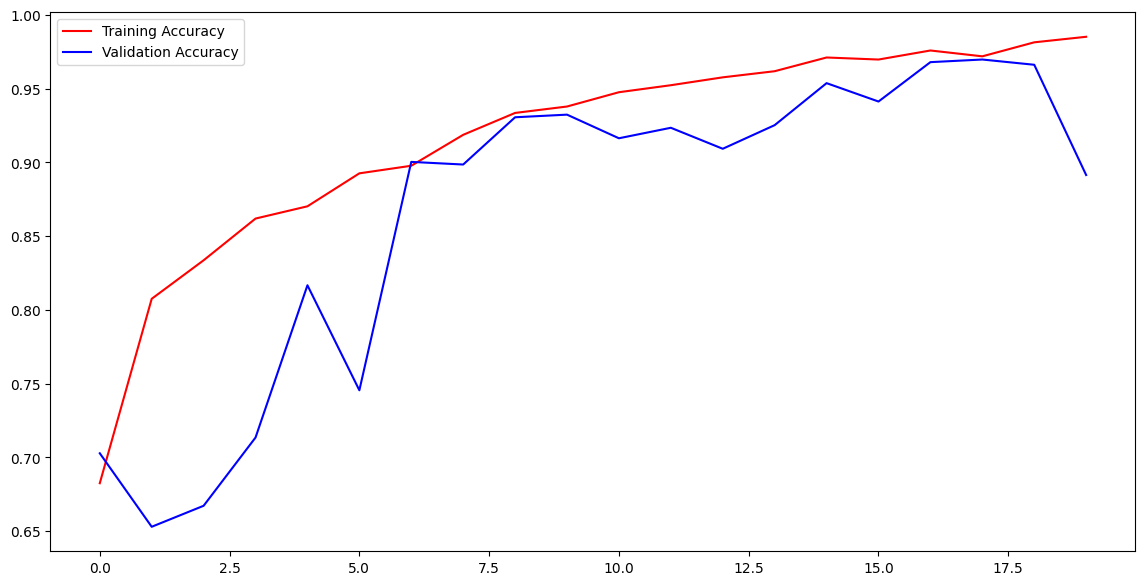

In [106]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

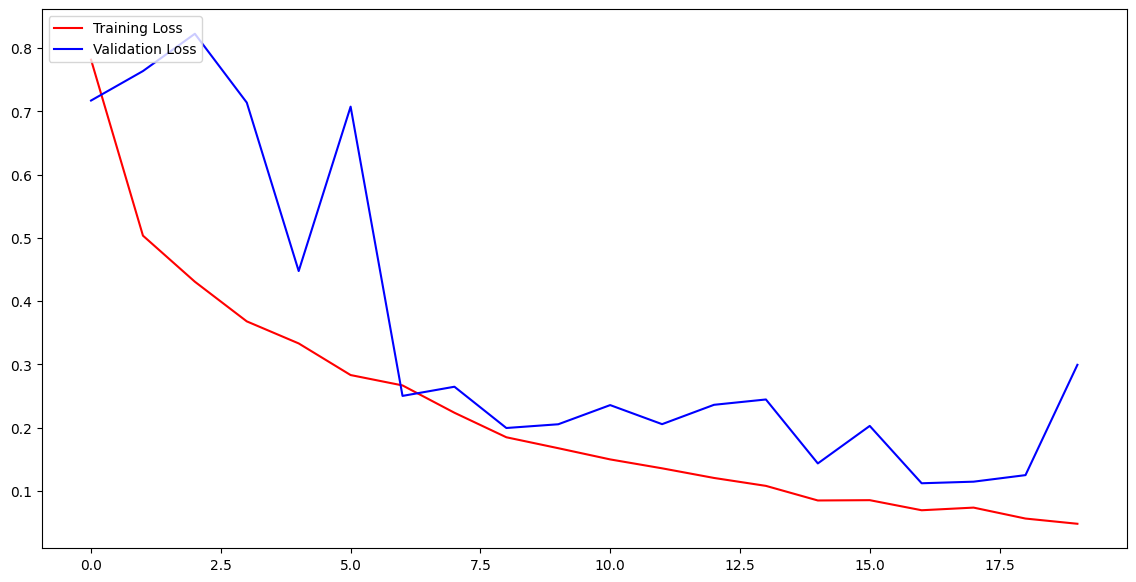

In [107]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper left')
plt.show()

**Prediction**

In [108]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [109]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

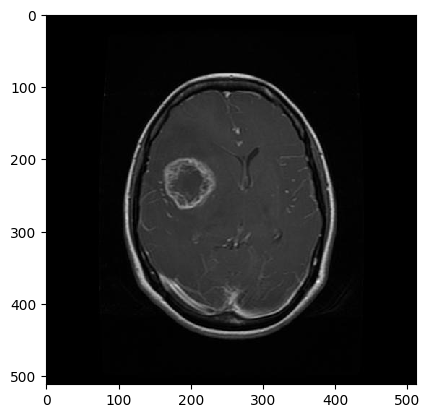

In [110]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [111]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 809ms/step


0